<a href="https://colab.research.google.com/github/everestso/Summer22/blob/main/mlExampleSimpledtreeSparks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
import pydotplus

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import math


In [2]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Nicolas Sparks or Indiana Jones

In [3]:
datasetsDir = "/content/gdrive/My Drive/csuf/Resources/Datasets/"
csv_path = os.path.join(datasetsDir, "IndianaJonesNicholasSparks - Sheet2.csv")
data = pd.read_csv(csv_path)
print(data)

                                   Name  h  clm  sf  e  c  s  Y
0                             Dear John  1    1   1  1  1  1  0
1                          The Notebook  1    1   0  0  1  1  0
2                            Best of Me  0    0   1  0  1  0  0
3                            Safe Haven  0    1   1  1  1  1  0
4                   Message in a Bottle  0    1   0  1  1  1  0
5  Indiana Jones and the Temple of Doom  1    1   1  1  0  1  1
6               Raiders of the Lost Ark  1    0   1  1  1  1  1
7          Kingdom of the Crystal Skull  1    0   1  1  1  0  1
8    Indiana Jones and the Last Crusade  1    0   1  0  0  1  1


In [4]:
X = data.drop(["Y","Name"], axis=1)
Y=data['Y'].values

classifier1 = DecisionTreeClassifier(criterion="gini")
classifier2 = DecisionTreeClassifier(criterion="entropy")
classifier1.fit(X,Y)
classifier2.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

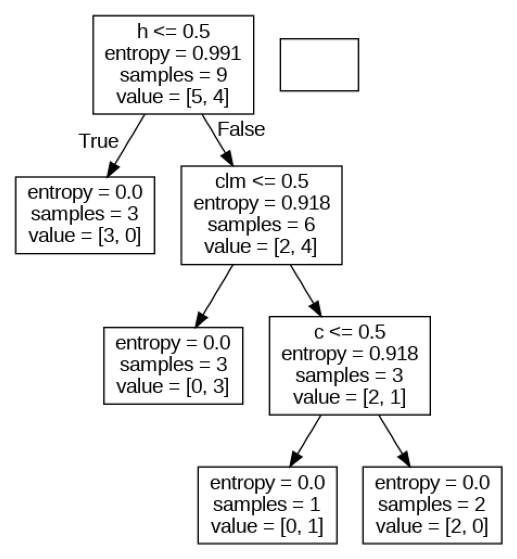

In [5]:
dotfile = open("dtree2.dot", 'w')
export_graphviz(classifier2, out_file = dotfile, feature_names = X.columns)
dotfile.close()

graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(7, 7))
plt.axis("off")
plt.imshow(img)
plt.show()